<a href="https://colab.research.google.com/github/lellabhaskar/DataScience/blob/main/2/4p_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regularization improves your model with help various techniques which are usually tiny manipulations. Regularizing also helps avoid overfitting (and sometimes to fix overfitting)

1) Making weights, biases or kernel parameters exactly 0 (L1/Ridge) or tending to 0(L2/Lasso), and sometimes their combination called Elastic or L1_L2

2) Data Augmentation (Convolutions-> we augmented the data so that learning was not just for a simple image but every variation and mutation)

3) Neural Networks - The Less you know, the More you know! We starting DROPPING information in subsequent layers. So 100% info in initial layers is learnt, but some information is randomly multiplied with 0. As a result future LAYERS will not get certain random data points and will LEARN how to draw WEIGHTS and BIASES even when the said data points were absent.

FACIAL Recognition-> train a model to recognize a person- sunglasses? shave/hair style?

Layer -> DROPOUT layer (randomly makes some of this weights as 0). Hence any number multiplied to them becomes 0! and thus information is lost.


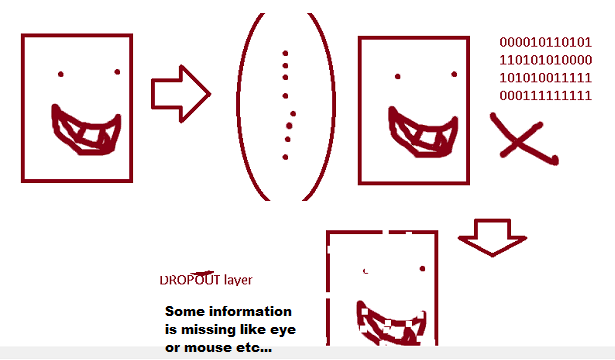

4) EPOCHS control how long our network runs. If model wasn't going to improve within certain conditions then it's better to STOP EARLY. EARLY-STOPPING can be applied in many ways -> threshold based (all algos below 90% should be dropped), median based (drop 50% poorly performing algos)

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow import keras

TensorFlow 1.x selected.
1.15.2


In [2]:
filepath = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = keras.utils.get_file('auto-mpg.data', filepath)
print(data)

32768/30286 [================================] - 0s 2us/step
/root/.keras/datasets/auto-mpg.data


In [3]:
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year', 'origin', 'car_name']
# now we are aware that these are TSV (tab-sep) and not simple CSVs
fl = pd.read_csv(data, names=col_names, sep=' ', comment='\t', na_values='?', skipinitialspace=True)
fl.head()
fl['car_name']
data = fl.iloc[:,:-1] # skipping car names are this is useless data for us (CORRELATION TEST, HEATMAP)
data.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df = data.dropna()
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [5]:
df.head(20)
df.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
df.model_year.value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model_year, dtype: int64

In [8]:
origins = df.pop('origin')
# based on this pop, we can create new columns
df['BLR'] = (origins==1)*1 # TRUE *1 = 1 
df['MAA'] = (origins==2)*1
df['BOM'] = (origins==3)*1

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,BLR,MAA,BOM
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [9]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,BLR,MAA,BOM
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [10]:
traindata = df.sample(frac=0.75, random_state=42)
testdata = df.drop(traindata.index)

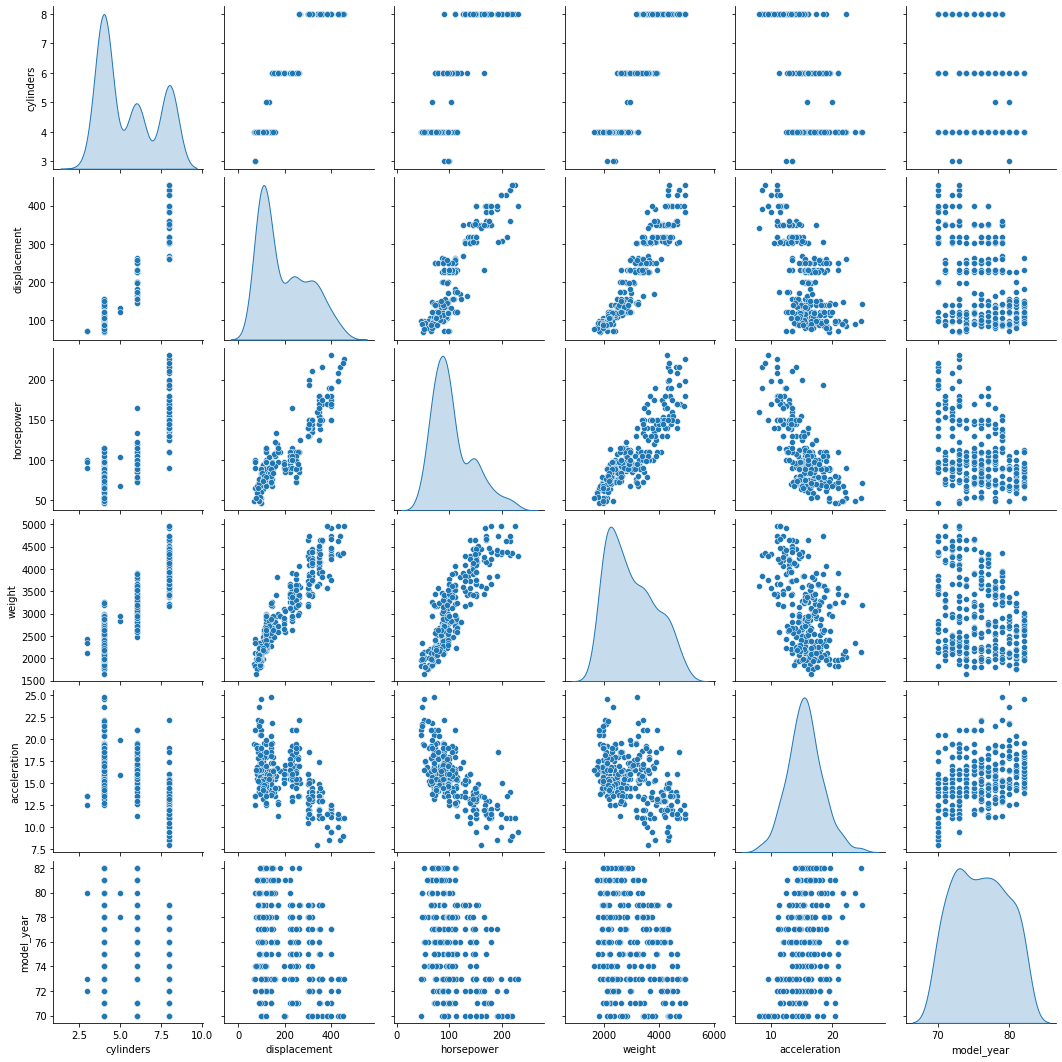

Index(['cylinders', 'displacement', 'horsepower', 'weight'], dtype='object')

In [11]:
myfeatures = traindata.columns[1:-3] # from cylinders till model_year
sns.pairplot(traindata[myfeatures], diag_kind='kde')
plt.show()
# MODEL year -> ALL OVER THE PLACE, no clear boundaries could be used 
myfeatures = myfeatures[:-2]
myfeatures

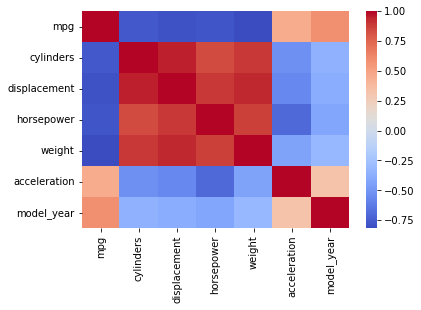

In [12]:
corrs = traindata.iloc[:,:-3].corr()
sns.heatmap(corrs, cmap='coolwarm')

In [13]:
myfeatures = traindata.columns[1:-5]
myfeatures

Index(['cylinders', 'displacement', 'horsepower', 'weight'], dtype='object')

In [14]:
ytrain = traindata.pop('mpg')
ytest = testdata.pop('mpg')
xtrain = traindata[myfeatures]
xtest = testdata[myfeatures]

In [15]:
xtest.head()

,cylinders,displacement,horsepower,weight
1,8,350.0,165.0,3693.0
8,8,455.0,225.0,4425.0
13,8,455.0,225.0,3086.0
14,4,113.0,95.0,2372.0
20,4,110.0,87.0,2672.0


In [16]:
stats = xtrain.describe().T
mu = stats['mean']
sigma = stats['std']
# z-score formula -> norm_data = (x-mu) / sigma
xtrain_norm = (xtrain-mu)/sigma
xtest_norm = (xtest-mu)/sigma 
xtest_norm.head()

,cylinders,displacement,horsepower,weight
1,1.450642,1.460190,1.517087,0.829423
8,1.450642,2.455653,3.042823,1.690548
13,1.450642,2.455653,3.042823,0.115347
14,-0.876718,-0.786713,-0.262939,-0.724603
20,-0.876718,-0.815154,-0.466370,-0.371683


In [17]:
HP_epoch = 1000
HP_dim_l1_l2_firstModel = 64
HP_dim_l2_l3_firstModel = 128
HP_lr_firstModel = 1e-3 # 0.001

HP_dim_l1_l2_secModel = 64
HP_dim_l2_l3_secModel = 256
HP_lr_secModel = 1e-3 # 0.01

opt1 = tf.keras.optimizers.RMSprop(HP_lr_firstModel)
opt2 = tf.keras.optimizers.RMSprop(HP_lr_secModel)

In [18]:
# First Model
m1 = keras.Sequential()
m1.add(keras.layers.Dense(HP_dim_l1_l2_firstModel,kernel_regularizer=keras.regularizers.l1(l=0.01), activation=tf.nn.relu,input_shape=[len(xtrain.keys())]))
m1.add(keras.layers.Dense(HP_dim_l2_l3_firstModel,kernel_regularizer=keras.regularizers.l1(l=0.01),  activation=tf.nn.relu))
m1.add(keras.layers.Dense(1,  activation= tf.nn.relu))
m1.compile(optimizer=opt1, loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
# Second Model

m2 = keras.Sequential()
m2.add(keras.layers.Dense(64, activation=tf.nn.relu,input_shape=[len(xtrain.keys())]))
m2.add(keras.layers.Dense(128, activation=tf.nn.relu)) # till this point-> 100% info
m2.add(keras.layers.Dropout(0.25)) # NO NEW PARAMS generated! 
m2.add(keras.layers.Dense(256, activation=tf.nn.relu)) # 100-25 = RANDOM 75% info left
m2.add(keras.layers.Dropout(0.25))
m2.add(keras.layers.Dense(1, activation= tf.nn.relu)) # 75 - 19 = 56% info left 
m2.compile(optimizer=opt2, loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])


In [20]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [21]:
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 41,921
Trainable params: 41,921
Non-trainable params: 0
__________________________________________________

In [23]:
class PrintAtEnd(keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs):
    if epoch %100 == 0: print('')
    print('.', end='') # end = ''  will ensure print doesn't change line after printing 

In [27]:
h1 = m1.fit(xtrain_norm, ytrain, epochs=HP_epoch, validation_split=0.2, 
            verbose=0, callbacks=[PrintAtEnd()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [32]:
h2 = m2.fit(xtrain_norm, ytrain, epochs=HP_epoch, validation_split=0.2, 
            verbose=0, callbacks=[PrintAtEnd()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [31]:
history = m2.fit(xtrain_norm, ytrain, epochs=HP_epoch, validation_split=0.2, 
            verbose=0, callbacks=[PrintAtEnd()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

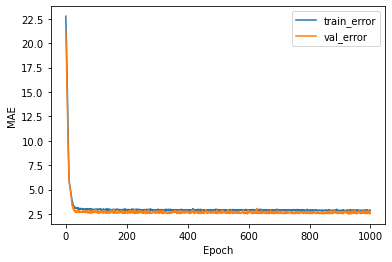

In [28]:
hist1 = pd.DataFrame(h1.history)
hist1['epoch'] = h1.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(hist1['mean_absolute_error'], label='train_error')
plt.plot(hist1['val_mean_absolute_error'], label='val_error')

plt.legend()
plt.show()

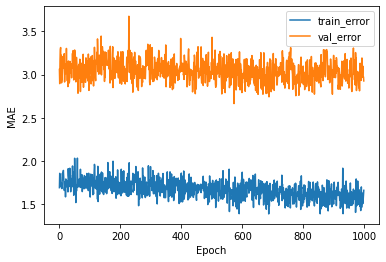

In [33]:
hist2 = pd.DataFrame(h2.history)
hist2['epoch'] = h2.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(hist2['mean_absolute_error'], label='train_error')
plt.plot(hist2['val_mean_absolute_error'], label='val_error')

plt.legend()
plt.show()

In [34]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

m2 = keras.Sequential()
m2.add(keras.layers.Dense(64, activation=tf.nn.relu,input_shape=[len(xtrain.keys())]))
m2.add(keras.layers.Dense(128, activation=tf.nn.relu)) # till this point-> 100% info
m2.add(keras.layers.Dropout(0.25)) # NO NEW PARAMS generated! 
m2.add(keras.layers.Dense(256, activation=tf.nn.relu)) # 100-25 = RANDOM 75% info left
m2.add(keras.layers.Dropout(0.25))
m2.add(keras.layers.Dense(1, activation= tf.nn.relu)) # 75 - 19 = 56% info left 
m2.compile(optimizer=opt2, loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])
hist_withEarlyStop = m2.fit(xtrain_norm, ytrain, epochs=HP_epoch, validation_split=0.2, 
            verbose=0, callbacks=[early_stopping])

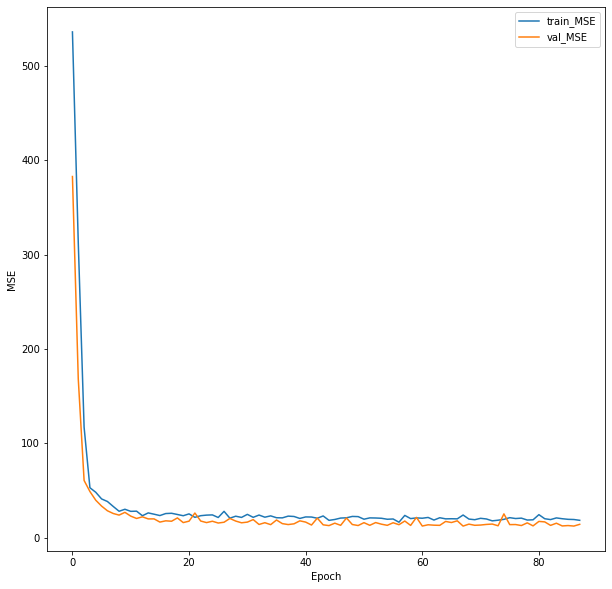

In [35]:
hist2 = pd.DataFrame(hist_withEarlyStop.history)
hist2['epoch'] = hist_withEarlyStop.epoch
plt.figure(figsize=(10,10))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(hist2['mean_squared_error'], label='train_MSE')
plt.plot(hist2['val_mean_squared_error'], label='val_MSE')

plt.legend()
plt.show()

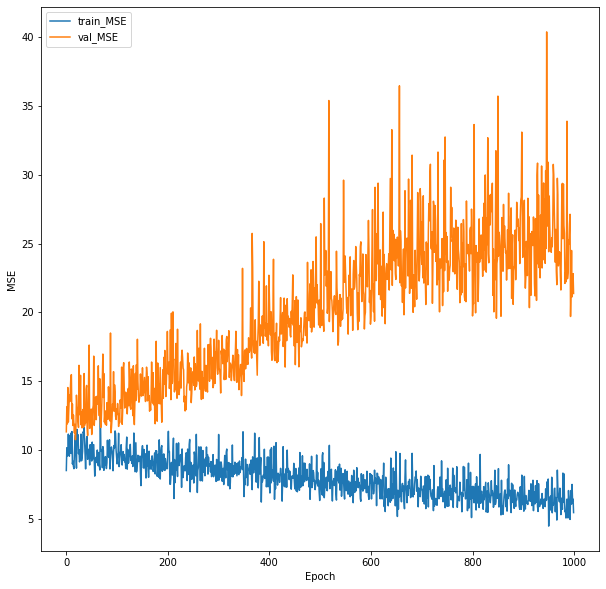

In [36]:
hist2 = pd.DataFrame(history.history)
hist2['epoch'] = h2.epoch
plt.figure(figsize=(10,10))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(hist2['mean_squared_error'], label='train_MSE')
plt.plot(hist2['val_mean_squared_error'], label='val_MSE')

plt.legend()
plt.show()

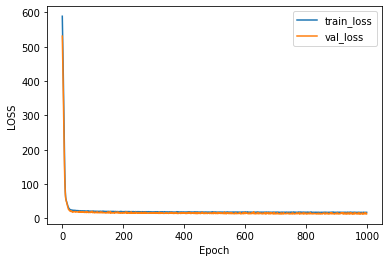

In [37]:
hist1 = pd.DataFrame(h1.history)
hist1['epoch'] = h1.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('LOSS')
plt.plot(hist1['loss'], label='train_loss')
plt.plot(hist1['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [38]:
predictions1 = m1.predict(xtest_norm)
predictions2 = m2.predict(xtest_norm)

In [39]:
predictions1[:5]

array([[15.539425 ],
       [14.8047905],
       [20.089577 ],
       [26.271864 ],
       [26.474985 ]], dtype=float32)

In [40]:
predictions2[:5]

array([[14.994051],
       [13.998586],
       [21.135145],
       [24.695517],
       [25.128359]], dtype=float32)